# Thompson Sampling

## Importing the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [36]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [37]:
import random
N = 1000
d = 10
ads_selected = []
numbers_of_rewards1 = [0] * d
numbers_of_rewards0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards1[i] + 1, numbers_of_rewards0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards1[ad] += 1
  else:
    numbers_of_rewards0[ad] += 1
  total_reward += reward

## Visualising the results - Histogram

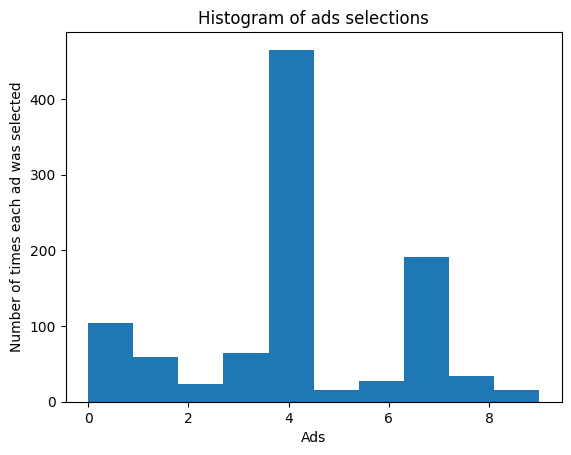

In [38]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()